Oskar Lewna 278779

## Light up - the game where we have BLACK and WHITE fields. Our goal is to place BULBS on WHITE fields to illuminate all of them but we can't place BULB that emits light on another BULB.

In [56]:
import pygad
import numpy as np
import copy as copy
from collections import Counter
import random
import time

### Imports

In [58]:
E1 = [["B","B","W","W","W"],
      ["W","W","B","W","B"],
      ["B","W","B","W","B"],
      ["B","W","B","W","B"],
      ["B","W","B","W","B"]]
# 2 bulbs

E2 = [["B","W","B","W","B"],
      ["W","W","W","W","W"],
      ["B","W","W","W","B"],
      ["W","W","W","W","W"],
      ["B","W","B","W","B"]]
# 3 bulbs

E3 = [["B","B","B","W","W"],
      ["B","B","W","B","W"],
      ["B","W","W","W","B"],
      ["B","B","W","B","B"],
      ["W","B","B","B","B"]]
# 3 bulbs

N1 = [["W","W","W","W","W","W","W","W","W","W"],
      ["W","B","W","B","W","B","W","W","B","W"],
      ["W","W","W","W","W","W","W","W","W","W"],
      ["W","W","W","W","W","B","W","W","B","W"],
      ["W","B","W","B","W","W","W","W","W","W"],
      ["W","W","W","W","W","W","B","W","B","W"],
      ["W","B","W","W","B","W","W","W","W","W"],
      ["W","W","W","W","W","W","W","W","W","W"],
      ["W","B","W","W","B","W","B","W","B","W"],
      ["W","W","W","W","W","W","W","W","W","W"]]
# 15 bulbs

N2 = [["B","W","W","W","B","W","B"],
      ["W","W","W","W","W","W","W"],
      ["B","W","W","W","W","W","W"],
      ["W","W","W","B","W","W","W"],
      ["W","W","W","W","W","W","B"],
      ["W","W","W","W","W","W","W"],
      ["B","W","B","W","W","W","B"]]
# 7 bulbs

N3 = [["B","W","W","W","W","B","W","W","B","B"],
      ["B","W","B","B","W","B","W","W","W","W"],
      ["W","W","B","B","W","W","W","B","B","W"],
      ["W","W","W","W","W","B","W","B","B","W"],
      ["B","B","W","B","W","W","W","W","W","W"],
      ["W","W","W","W","W","W","B","W","B","B"],
      ["W","B","B","W","B","W","W","W","W","W"],
      ["W","B","B","W","W","W","B","B","W","W"],
      ["W","W","W","W","B","W","B","B","W","B"],
      ["B","B","W","W","B","W","W","W","W","B"]]
# 17 bulbs

H1 = [
      ["W","W","B","W","W","W","W","B","W","W","W","W","W","B","W","W","W","W"],
      ["W","B","W","W","B","W","W","B","W","W","B","W","W","B","W","W","B","W"],
      ["W","W","W","B","W","W","B","W","W","W","W","B","W","W","B","W","W","B"],
      ["W","B","W","W","W","W","W","W","B","B","W","B","W","W","W","W","W","W"],
      ["B","W","W","W","B","B","W","B","W","W","W","W","W","W","B","B","W","W"],
      ["W","W","B","B","W","W","W","W","W","W","B","W","B","B","W","W","W","B"],
      ["W","W","W","W","W","W","B","W","B","B","W","W","W","W","W","W","B","W"],
      ["B","W","W","B","W","W","B","W","W","W","W","B","W","W","B","W","W","W"],
      ["W","B","W","W","B","W","W","B","W","W","B","W","W","B","W","W","B","W"],
      ["W","W","W","W","B","W","W","W","W","W","B","W","W","W","W","B","W","W"]]
# 31 bulbs

H2 = [
      ["B","B","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W"],
      ["B","B","W","W","B","W","W","W","W","W","W","B","W","B","W","B","W","W"],
      ["W","W","W","B","W","W","W","W","W","W","W","W","B","W","W","W","B","W"],
      ["W","W","B","W","B","W","B","W","B","B","W","B","W","B","W","B","W","W"],
      ["W","B","W","W","B","W","W","W","W","W","W","W","W","W","W","W","W","W"],
      ["W","W","W","W","W","W","W","W","W","W","W","W","W","B","W","W","B","W"],
      ["W","W","B","W","B","W","B","W","B","B","W","B","W","B","W","B","W","W"],
      ["W","B","W","W","W","B","W","W","W","W","W","W","W","W","B","W","W","W"],
      ["W","W","B","W","B","W","B","W","W","W","W","W","W","B","W","W","B","B"],
      ["W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","B","B"]]
# 20 bulbs

H3 = [
    ["W","W","W","W","W","W","W","W","B","W","W","B","W","W","W","W","W","W"],
    ["W","W","B","W","B","W","W","B","W","W","W","W","B","W","W","W","W","W"],
    ["W","B","W","W","W","B","W","W","W","W","W","W","W","W","W","W","W","W"],
    ["W","W","W","W","W","W","W","W","W","W","W","W","B","W","W","W","W","W"],
    ["W","B","W","W","W","W","W","W","W","W","W","B","W","W","W","W","W","B"],
    ["B","W","W","W","W","W","B","W","W","W","W","W","W","W","W","W","B","W"],
    ["W","W","W","W","W","B","W","W","W","W","W","W","W","W","W","W","W","W"],
    ["W","W","W","W","W","W","W","W","W","W","W","W","B","W","W","W","B","W"],
    ["W","W","W","W","W","B","W","W","W","W","B","W","W","B","W","B","W","W"],
    ["W","W","W","W","W","W","B","W","W","B","W","W","W","W","W","W","W","W"]]
# 26 bulbs

easy = [E1,E2,E3]
easy_answer = [2,3,3]
normal = [N1,N2,N3]
normal_answer = [15,7,17]
hard = [H1,H2,H3]
hard_answer = [31,20,26]
# level = E2

### Inputs of our boards: E - easy, N - normal and H - hard.

In [59]:
gene_space = [1,0] #BULB OR NOT

### Our genes will be 0 (no bulb) or 1 (bulb) 

In [60]:
def fitness_func(solution, solution_idx):
    fitness = 0
    bulbs = np.sum(solution)
    board = copy.deepcopy(level)
    id = 0

    for i in range(0,len(board)):
        for j in range(0,len(board[0])):
            if(solution[id]==1 and board[i][j]=="B"):
                fitness += 1
                continue
            elif(solution[id]==1 and board[i][j]=="L"):
                fitness += 1
                continue
            elif (solution[id]==1 and board[i][j]=="W"):
                board[i][j] = "O"
                for a in range(i,-1,-1):
                    if(board[a][j]=="W"):
                        board[a][j]="L"
                    elif(board[a][j]=="B"):
                        break
                for a in range(i,len(board)):
                    if(board[a][j]=="W"):
                        board[a][j]="L"
                    elif(board[a][j]=="B"):
                        break
                for a in range(j,-1,-1):
                    if(board[i][a]=="W"):
                        board[i][a]="L"
                    elif(board[i][a]=="B"):
                        break
                for a in range(j,len(board[i])):
                    if(board[i][a]=="W"):
                        board[i][a]="L"
                    elif(board[i][a]=="B"):
                        break
            id +=1

    empty = dict(sum(map(Counter, board), Counter()))
    if(empty.get("W")!=None):
        fitness += empty.get("W")

    return -(fitness + bulbs)

fitness_function = fitness_func

### In the first fitness function we will count remaining WHITE fields by adding them to result and substracting illuminated fields. In addition we will add amount of used BULBS and BULBS placed on BLACK fields. It is complicated fitness function so the algorithm will calculate longer.

In [69]:
def board_final(solution):
    board = copy.deepcopy(level)
    id = 0
    
    for i in range(0,len(board)):
        for j in range(0,len(board[i])):
            if(solution[id]==1 and board[i][j]!="B"):
                board[i][j]="🟨"
            elif(board[i][j]=="W"):
                board[i][j] = '⬜'
            else:
                board[i][j] = '⬛'
            id += 1

    return board

### Function board_final shows us how our algorithm placed BULBS.

### The game has different levels with different amount of fields. The more fields it has the more generations is needed.

In [14]:
good = 0
average_time = 0
for i in range(0,100):
    x = random.randint(0,2)
    level = easy[x]
    params = [300,600]

    num_genes = len(level)*len(level[0])
    sol_per_pop = params[0]
    num_parents_mating = params[0]//2
    num_generations = params[1]
    mutation_percent_genes = 4
    keep_parents = 2

    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"

    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes)
    start = time.time()
    ga_instance.run()
    end = time.time()
    average_time += end-start
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if (int(solution_fitness*-1)== easy_answer[x]):
        good += 1
    
print("Accuracy: " + str(round(good*100/100,2)))
print("Average time: " + str(average_time/100))

Accuracy: 100.0
Average time: 29.91530811548233


### 100 iterations with easy level inputs

In [16]:
good = 0
average_time = 0
for i in range(0,100):
    x = random.randint(0,2)
    level = normal[x]
    params = [300, 600]

    num_genes = len(level)*len(level[0])
    sol_per_pop = params[0]
    num_parents_mating = params[0]//2
    num_generations = params[1]
    mutation_percent_genes = 4
    keep_parents = 2

    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"

    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes)
    start = time.time()
    ga_instance.run()
    end = time.time()
    average_time += end-start
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if (int(solution_fitness*-1)== normal_answer[x]):
        good += 1
    
print("Accuracy: " + str(round(good*100/100,2)))
print("Average time: " + str(average_time/100))

Accuracy: 1.0
Average time: 39.06829155445099


### 100 iterations with medium level inputs

In [17]:
good = 0
average_time = 0
for i in range(0,100):
    x = random.randint(0,2)
    level = hard[x]
    params = [300, 600]

    num_genes = len(level)*len(level[0])
    sol_per_pop = params[0]
    num_parents_mating = params[0]//2
    num_generations = params[1]
    mutation_percent_genes = 4
    keep_parents = 2

    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"

    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes)
    start = time.time()
    ga_instance.run()
    end = time.time()
    average_time += end-start
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if (int(solution_fitness*-1)== hard_answer[x]):
        good += 1
    
print("Accuracy: " + str(round(good*100/100,2)))
print("Average time: " + str(average_time/100))

Accuracy: 0.0
Average time: 66.0371035528183


### 100 iterations with hard level inputs

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0.]
-14.0
⬜	🟨	⬜	⬜	⬜	⬜	⬜	⬜	⬜	⬜
⬜	⬛	⬜	⬛	⬜	⬛	🟨	⬜	⬛	⬜
⬜	⬜	⬜	⬜	⬜	⬜	⬜	⬜	🟨	⬜
⬜	⬜	⬜	🟨	⬜	⬛	⬜	⬜	⬛	⬜
⬜	⬛	🟨	⬛	🟨	⬜	⬜	⬜	⬜	⬜
⬜	⬜	⬜	🟨	⬜	⬜	⬛	⬜	⬛	⬜
⬜	⬛	⬜	⬜	⬛	⬜	⬜	🟨	⬜	⬜
⬜	⬜	⬜	⬜	⬜	⬜	🟨	⬜	⬜	⬜
🟨	⬛	⬜	⬜	⬛	🟨	⬛	⬜	⬛	🟨
⬜	⬜	⬜	🟨	⬜	⬜	⬜	⬜	⬜	⬜


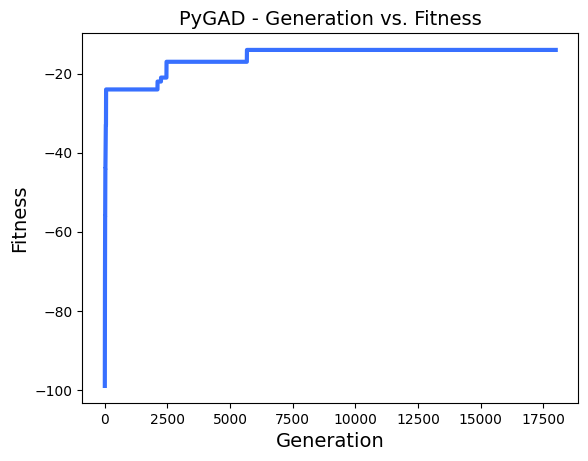

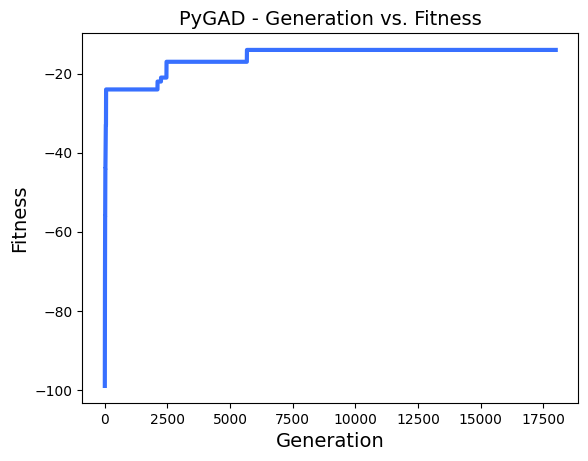

In [70]:
level = N1
params = [100, 18000]

num_genes = len(level)*len(level[0])
sol_per_pop = params[0]
num_parents_mating = params[0]//2
num_generations = params[1]
mutation_percent_genes = 4
keep_parents = 2

parent_selection_type = "rank"
crossover_type = "single_point"
mutation_type = "random"

ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes)

ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
matrix = board_final(solution)
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in matrix]))
ga_instance.plot_fitness()

### There we have the graphic code of how the algorithm works. Firstly, it shows how algorithm placed bulbs and second shows how algorithm was evolving through generations.

# To sum up, this algorithm works but it consumes a lot of time. Fitness function is complicated but without any of those lines it would not work perfectly. Unfortunatelly, for bigger boards it will not find perfect answer because chromosome is long.